<a href="https://colab.research.google.com/github/slwilliams055/KNN/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!git clone https://github.com/slwilliams055/KNN.git

fatal: destination path 'KNN' already exists and is not an empty directory.


#Q1
1. Regression refers to predicting a numeric outcome while clssification regers to predicting a categorical outcome. Regression models map input variables to a continuous function, whereas classification maps inputs to distinct categories.
2. A confusion table is a cross-tabulation of predicted and actual values in a dataset. It is a performance evaluation tool for classification models that summarizes the accuracy of predictions by comparing predicted labels against actual target values.
3. SSE is the sum-of-squared error for a model. It quantifies the total discrepancy between observed values and values predicted by a model. It sums the squared differences (residuals) to measure a model's goodness-of-fit. Lower values of SSE indicate a tighter fit and better accuracy.
4. Overfitting occurs when a machine learning model is trained on highly specific data and learns it "too well." The model will capture very specific details of the data it was trained on and doesn't generalize well. Underfitting occurs when a model is too simple to learn anything about the underlying structure of the data. Underfitting will result in poor performance on both training and test datasets.
5. Splitting the data into training and testing sets improves model performance by preventing overfitting. The model learns patterns on the training set while the test set simulates real-world performance to ensure the model can generalize to unseen data and provide an unbiased evaluation. Choosing a model by evaluating accuracy or SSE on the test set allows the model to be optimized for generalizability on unseen data instead of just memorizing training data.
6. Reporting a class label as a prediction (hard classification) provides a direct answer and is easier to understand and communicate to end-users. It is efficient when the end goal is a rapid decision. The downside of using hard classification is that it can act as a forced choice which can be inefficient if errors occur. A probability distribution over class labels is able to indicate how confident a model is, which is better for handling uncertain and non-binary cases. This method allows for decidion making based on a level of risk and models that output probabilties can often be tuned to achieve better results. Its weakness is that it can be harder to interpret, and training often requires more data and computation. In short, hard classification is efficient and straight to the point but it doesn't have much flexibility, whereas probability distributions are complex but give more flexibility and room for understanding error and risk.

# Q2
Case study for knn regression using cars dataset

k = 3, MSE = 148065935.52


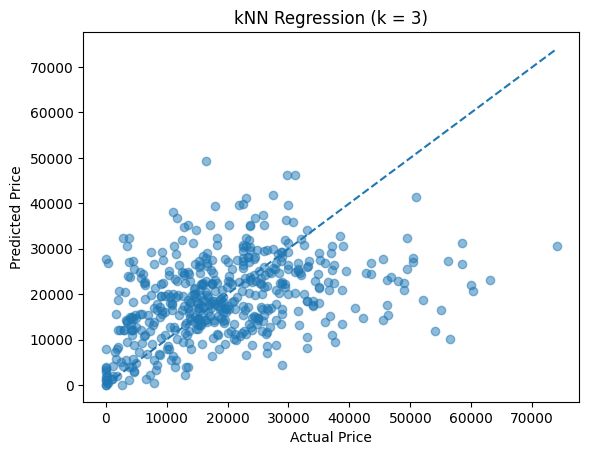

k = 10, MSE = 117399126.11


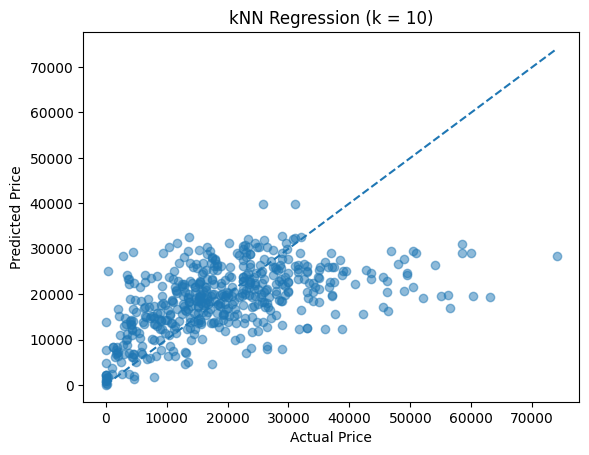

k = 25, MSE = 112576160.82


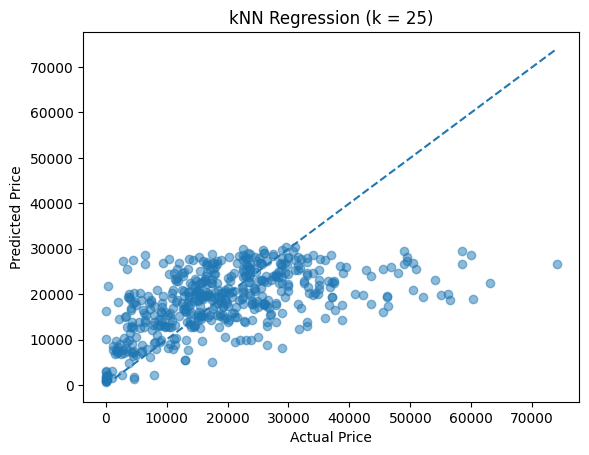

k = 50, MSE = 110202549.30


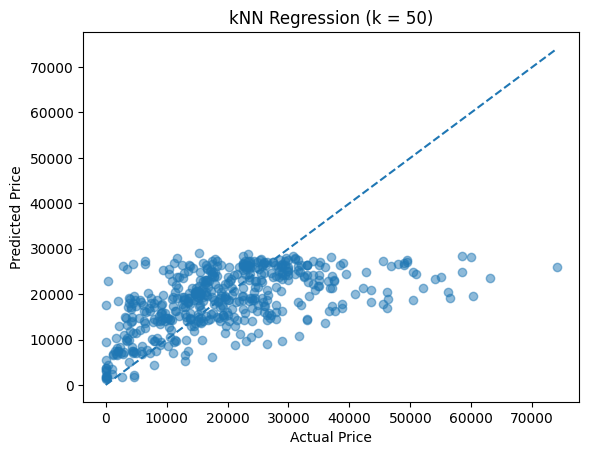

k = 100, MSE = 112253932.82


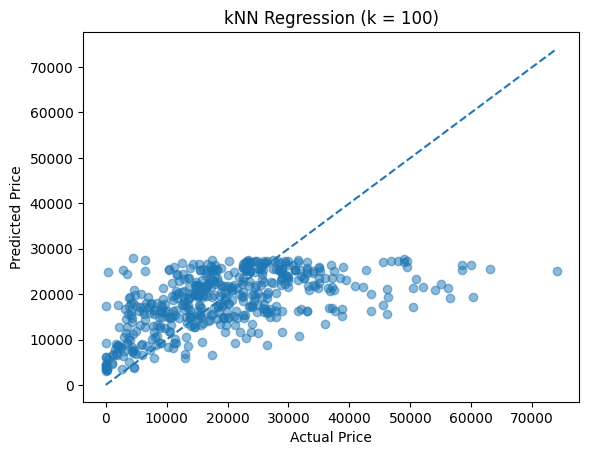

k = 300, MSE = 114496301.83


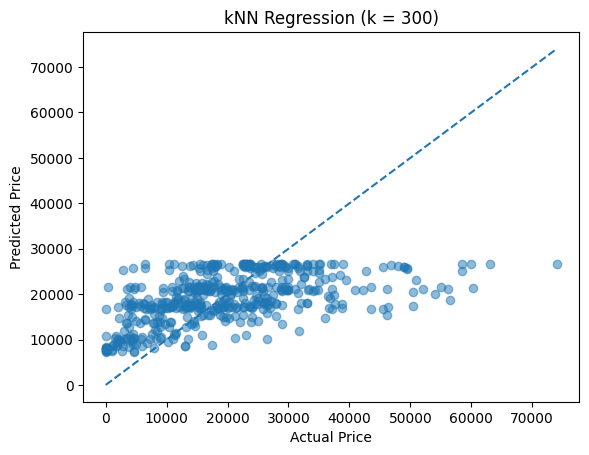

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 1
df = pd.read_csv("KNN/data/USA_cars_datasets.csv")
df = df[['price', 'year', 'mileage']]
df.isna().sum()
df.head()
df.shape # (2499, 3)
# There are no nas to handle, and because I only kept the three variables, price year and mileage, there are 3 variables and 2499 observations

### 2 ---------------------------------------------------
# max–min normalization
df['year_norm'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage_norm'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())
df[['year_norm', 'mileage_norm']].describe()

### 3 ---------------------------------------------------
# Split the sample into ~80% for training and ~20% for evaluation.
X = df[['year_norm', 'mileage_norm']]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape

### 4 -----------------------------------------------------
# Use kNN algorithm to predict price using year and mileage
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
    # Fit kNN regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Compute MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse
    print(f"k = {k}, MSE = {mse:.2f}")

    # Scatter plot: actual vs predicted
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             linestyle='--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"kNN Regression (k = {k})")
    plt.show()

4) As the k increases (and thus the number of nearest neighbors), the kNN regression predictions become smoother and less sensitive to local variation in the data. For small values of k, the model shows high variance and produces noise. As k increases to moderate values (k=50), prediction accuracy imrpoves and the mean squared error decreases. For very large k, predicitons converge toward the overall mean price, leading to underfitting and increased bias. You can see this both in the MSE for each k value as it decreases from k=3 to k=50, is lowest at k=50, and begins to increase again for k=100 and k=300.

5) k=50 is optimal for this dataset.

6) As k varied, the plots of predicted versus actual prices showed patterns that on a first glance might be positive, but actually are representative of over/underfitting at points. When k was small (k=3), the model fit the training data very well, showing all small fluctuations in price. While this shows data trends, it demonstrates overfitting, resulting in predictions that were extremely sensitive to individual datapoints. This indicates the model performed well on training data, but poorly generalized to new data and had a high MSE. As k increased to k=50, the predicitons became smoother and more aligned with the overall trend in prices. This is where the model can best balance bias and variance, giving the best predictive performance (indicated by optimal MSE). When k became very large (k=300), the model averaged over many neighbors, ignoring local variations and underfitting the data. Here, the model is too simple to accurately represent the data, which you can see as the data starts to level out towards the middle as k increases.

# Q3



Class sizes: 

class
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: count, dtype: int64
Class 1 example animals: ['aardvark', 'antelope', 'bear', 'boar', 'buffalo']
Class 2 example animals: ['chicken', 'crow', 'dove', 'duck', 'flamingo']
Class 3 example animals: ['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara']
Class 4 example animals: ['bass', 'carp', 'catfish', 'chub', 'dogfish']
Class 5 example animals: ['frog', 'frog', 'newt', 'toad']
Class 6 example animals: ['flea', 'gnat', 'honeybee', 'housefly', 'ladybird']
Class 7 example animals: ['clam', 'crab', 'crayfish', 'lobster', 'octopus']

Feature summary stats:
          count      mean       std  min  25%  50%  75%  max
hair      101.0  0.425743  0.496921  0.0  0.0  0.0  1.0  1.0
feathers  101.0  0.198020  0.400495  0.0  0.0  0.0  0.0  1.0
eggs      101.0  0.584158  0.495325  0.0  0.0  1.0  1.0  1.0
milk      101.0  0.405941  0.493522  0.0  0.0  0.0  1.0  1.0
airborne  101.0  0.237624  0.427750  0.0  0.0  0

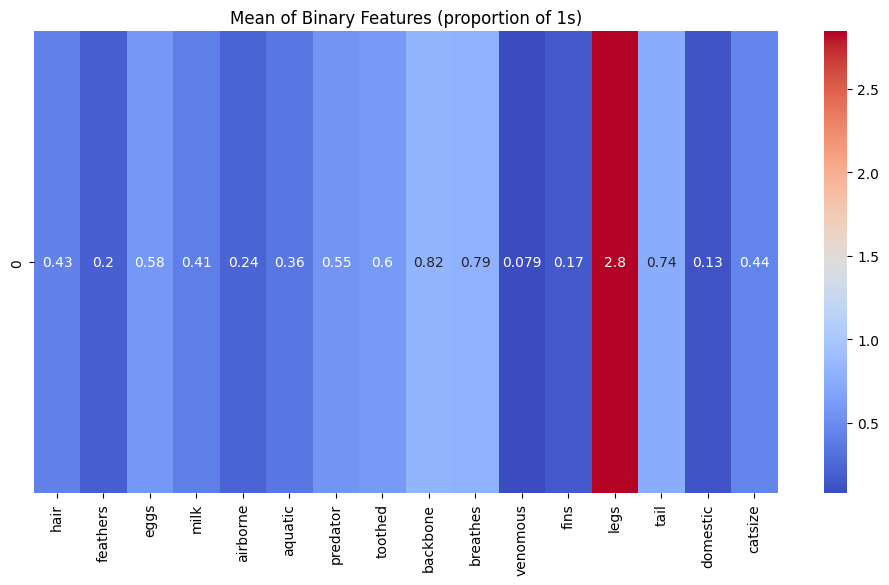


Correlation of features with class:
backbone   -0.828845
milk       -0.723683
eggs        0.661825
tail       -0.631830
hair       -0.562384
catsize    -0.521030
breathes   -0.519308
toothed    -0.471527
aquatic     0.326639
venomous    0.321476
feathers   -0.197520
domestic   -0.181043
legs        0.131693
fins        0.099430
predator    0.061179
airborne    0.022677
dtype: float64


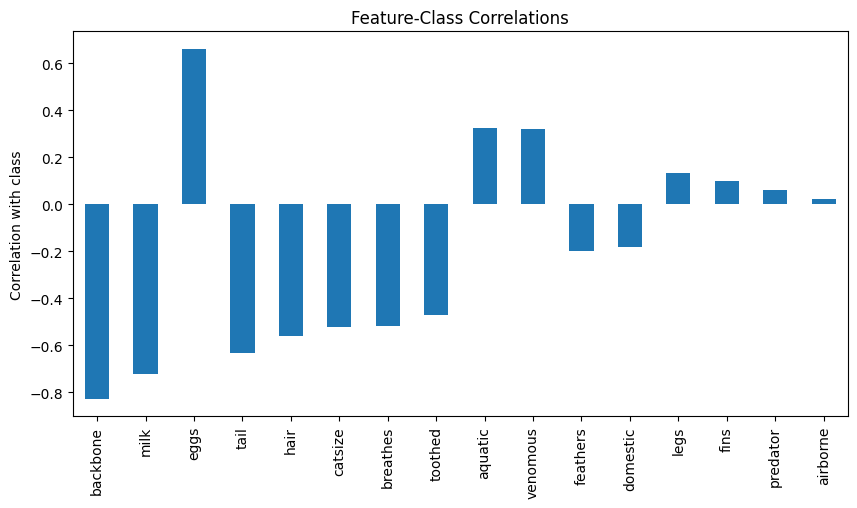

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1 ---------------------------------------------------
df = pd.read_csv("KNN/data/zoo.csv")
#print(df.head())

# class sizes and members
class_counts = df['class'].value_counts().sort_index()
print("\nClass sizes: \n")
print(class_counts)

for c in sorted(df['class'].unique()):
    animals = df[df['class'] == c]['animal'].tolist()[:5]  # first 5 for brevity
    print(f"Class {c} example animals: {animals}")

# feature variation
print("\nFeature summary stats:")
print(df.describe().T)

'''
print(df.describe())
binary_features = df.columns[1:17]  # assuming first two columns are class and animal
for feature in binary_features:
    print(f"{feature} value counts:\n{df[feature].value_counts()}\n")\
'''

corr = df[binary_features].corrwith(df['class'])
print("\nCorrelation of features with class:")
print(corr.sort_values(key=abs, ascending=False))
# Optional: bar plot of correlations
plt.figure(figsize=(10,5))
corr.sort_values(key=abs, ascending=False).plot(kind='bar')
plt.ylabel("Correlation with class")
plt.title("Feature-Class Correlations")
plt.show()

How big are the classes?

  - For the most part the classes actually arent that big and only one has many more values than the other. I didn't want to show all the animals in the class but I wanted to see what it was placing where. You can see for the most part, many of the animals actually do share characteristics. There are some that I could see overlapping.

How much variation is there in each of the features/covariates?

  - The "Feature summary stats" shows that all the features were recorded the same number of times. Most features are binary, so mean describes the proportion of animals that have that feature. You can see based on this, 1) the features that arent binary, because they don't really fall into the same scale, and 2) which features were recorded more often, etc. It doesn't tell you a whole lot because theyre very binary, but mean is helpful.

Which variables do you think will best predict which class?
  
  - Based on the correlation analysis for each class, it looks like eggs will predict class the best. Overall, many of these variables don't do a great job, but my guess is that this is because there is a lot of overlap between classes and characteristics, etc.

In [10]:
### 2 ------------------------------------------------------
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
# Features and labels
X = df.drop(columns=['class', 'animal'])
y = df['class']
# 50/50 split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)
# Check class balance
print("Training set class counts:")
print(y_train.value_counts())
print("\nTest set class counts:")
print(y_test.value_counts())


### 3 ------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
k_values = range(1, 21)
accuracies = []
for k in k_values:
    pipe.set_params(knn__n_neighbors=k)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    print(accuracies)
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)

print(f"Best k: {best_k}")
print(f"Validation accuracy: {best_acc:.3f}")


Training set class counts:
class
1    20
2    10
4     6
7     5
6     4
3     3
5     2
Name: count, dtype: int64

Test set class counts:
class
1    21
2    10
4     7
7     5
6     4
5     2
3     2
Name: count, dtype: int64
[0.9607843137254902]
[0.9607843137254902, 0.9607843137254902]
[0.9607843137254902, 0.9607843137254902, 0.9607843137254902]
[0.9607843137254902, 0.9607843137254902, 0.9607843137254902, 0.9019607843137255]
[0.9607843137254902, 0.9607843137254902, 0.9607843137254902, 0.9019607843137255, 0.9215686274509803]
[0.9607843137254902, 0.9607843137254902, 0.9607843137254902, 0.9019607843137255, 0.9215686274509803, 0.9215686274509803]
[0.9607843137254902, 0.9607843137254902, 0.9607843137254902, 0.9019607843137255, 0.9215686274509803, 0.9215686274509803, 0.8823529411764706]
[0.9607843137254902, 0.9607843137254902, 0.9607843137254902, 0.9019607843137255, 0.9215686274509803, 0.9215686274509803, 0.8823529411764706, 0.8823529411764706]
[0.9607843137254902, 0.9607843137254902, 0.96

Validation accuracy was evaluated for values of k from 1 to 20. The highest accuracy (96%) was achieved for k=1,2,3 with performance declining as k increased further. This indicates that small nearest neighbor values are highly informative. Although small values of k can lead to overfitting in k-nearest neighbors classifiers, selecting k=1 is reasonable for this dataset. The animal characteristics are largely binary and strongly associated with class membership, leading to well-separated classes in feature space. As a result, the nearest neighbor is often highly informative, and increasing k introduces bias by averaging across distinct classes. Validation accuracy was maximized at k=1, indicating that local structure dominates global smoothing for this problem.



In [8]:
### 4 -------------------------------------------------------------------
# Print a confusion table for the optimal model, comparing predicted and actual class label on the test set.
from sklearn.metrics import confusion_matrix, accuracy_score
# Fit optimal model (k = 1)
pipe.set_params(knn__n_neighbors=1)
pipe.fit(X_train, y_train)
# Predict on test set
y_pred = pipe.predict(X_test)
# Confusion table
cm = confusion_matrix(y_test, y_pred)
print("Confusion table (rows = actual, columns = predicted):")
print(cm)
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Confusion table (rows = actual, columns = predicted):
[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  5]]
Accuracy: 0.9607843137254902


Accuracy: The overall test accuracy of the model is approximately 96%, meaning that nearly all animals in the test set are classified correctly. You can see this in the confusion table because most observations fall on the diagonal, indicating correct classification.

Mistakes: The few misclassifications occur between biologically similar groups.  Classes that share overlapping characteristics may be more likely to be confused because they have similar binary feature patterns. Since kNN relies on similarity in feature space and does not have domain knowledge, animals with shared traits but different class labels can appear close to one another, leading to classification errors.

In [11]:
### 5 ----------------------------------------------------------------------
# Select only the three features
X_small = df[['milk', 'aquatic', 'airborne']]
y = df['class']

# 50/50 split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)
# kNN model (use same k = 1 for consistency)
pipe_small = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=1))
])
pipe_small.fit(X_train_s, y_train_s)

# Predict labels
y_pred_s = pipe_small.predict(X_test_s)

# Confusion table
cm_small = confusion_matrix(y_test_s, y_pred_s)
print("Confusion table (rows = actual, columns = predicted):")
print(cm_small)
probs = pipe_small.predict_proba(X_test_s.values)

print("Shape of probability array:", probs.shape)
print("Classes seen by the model:", pipe_small.named_steps['knn'].classes_)

# Show probabilities for first few test points
print(pd.DataFrame(probs[:5], columns=pipe_small.named_steps['knn'].classes_))

Confusion table (rows = actual, columns = predicted):
[[19  2  0  0  0  0  0]
 [ 0  7  2  1  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  3  1  0  0  0  0]
 [ 0  0  1  4  0  0  0]]
Shape of probability array: (51, 7)
Classes seen by the model: [1 2 3 4 5 6 7]
     1    2    3    4    5    6    7
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Since I trained this new kNN classifier on only the features milk aquatic and airborne, the resulting confusion table showed that only a subset of classes were predicted. The confusion table shows columns 5,6, and 7 as 0 and the probability output confirms that classes 5, 6 and 7, have a probability of 0. This shows that the selected variables, "milk","aquatic", and "airborne" don't provide sufficient information to distinguish all 7 animal classes. Many classes have the same values for these variables, causing them to overlap. As a result, kNN asigns observations to the dominant class within each feature combination.

# Q4


count    22010.000000
mean       154.762699
std        148.993525
min         10.000000
25%         85.000000
50%        125.000000
75%        190.000000
max      10000.000000
Name: Price, dtype: float64
0
Price
150.0     1015
100.0      745
200.0      684
125.0      660
75.0       582
          ... 
347.0        1
3500.0       1
945.0        1
3100.0       1
454.0        1
Name: count, Length: 462, dtype: int64


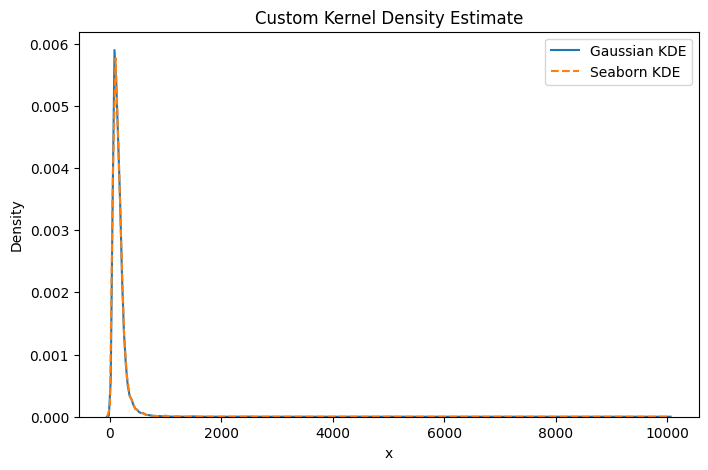

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

def gaussian_kernel(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)
def uniform_kernel(z):
    return np.where(np.abs(z) <= 1, 0.5, 0)
def epanechnikov_kernel(z):
    return np.where(np.abs(z) <= 1, 0.75 * (1 - z**2), 0)
# all the different kernels we can use, as functions so we can just call them easily.

def kernel_density_plot(
    data,
    kernel="gaussian",
    bandwidth=None,
    grid_points=300,
    ax=None
):
    # Parameters:
    # data: array-like
    # kernel: use gaussian as default due to its smoothness and infinite support.
      # uniform and epanechnikov included to allow comparison with compact-support alternatives.
    # bandwidth: float or none. if none, use silvermans

    # Input handling - this allows you to actually use the data input regardless of its format.
    # assuming most data will be df.
    data = np.asarray(data)
    data = data[~np.isnan(data)]
    n = len(data)
    if bandwidth is None: # Bandwidth selection
        std = np.std(data, ddof=1)
        bandwidth = 1.06 * std * n ** (-1 / 5) # silverman plug in equation

    # Evaluation grid  - just decide where were actually working
    xmin = data.min() - 3 * bandwidth
    xmax = data.max() + 3 * bandwidth
    x_grid = np.linspace(xmin, xmax, grid_points)

    # Distance calculation - using scipy cdist because it is cleaner and better for readability.
    # Shape: (grid_points, n)
    z = cdist(x_grid.reshape(-1, 1),
              data.reshape(-1, 1)) / bandwidth

    # Kernel selection - gaussian default kernel

    if kernel == "gaussian": # gaussian is defined everywhere, which is why I chose it as the default
        K = gaussian_kernel(z)
    elif kernel == "uniform":
        K = uniform_kernel(z)
    elif kernel == "epanechnikov":
        K = epanechnikov_kernel(z)
    else:
        raise ValueError("Kernel must be 'gaussian', 'uniform', or 'epanechnikov'") # this is just so that the user uses one of the 3.

    # Density estimate
    density = K.sum(axis=1) / (n * bandwidth) # for the distribution of the dataset. helps understand areas of high and low density

    # Plot
    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(x_grid, density, label=f"{kernel.capitalize()} KDE")
    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.set_title("Custom Kernel Density Estimate")
    ax.legend()
    return x_grid, density



float64


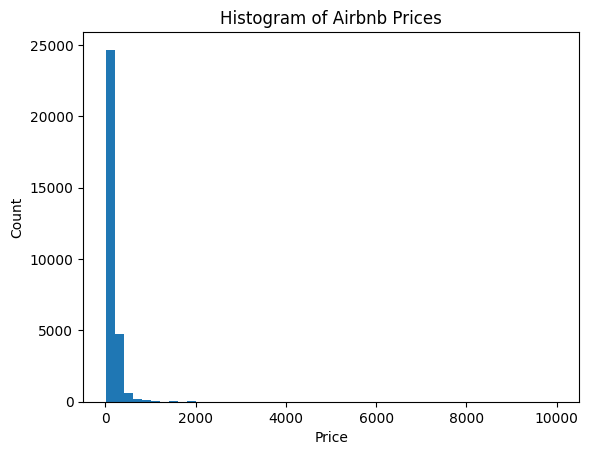

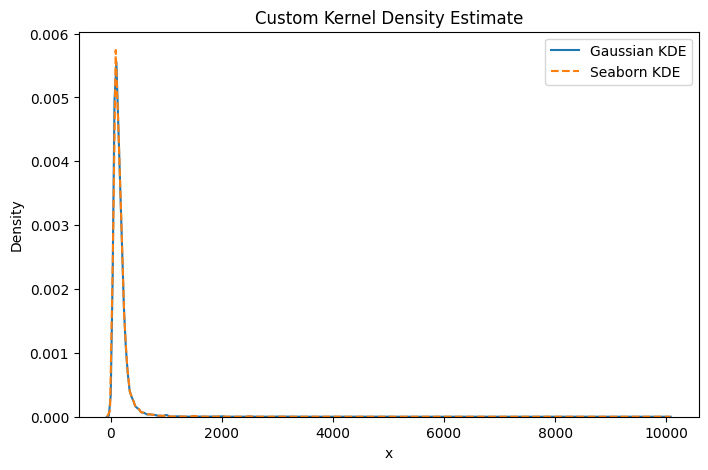

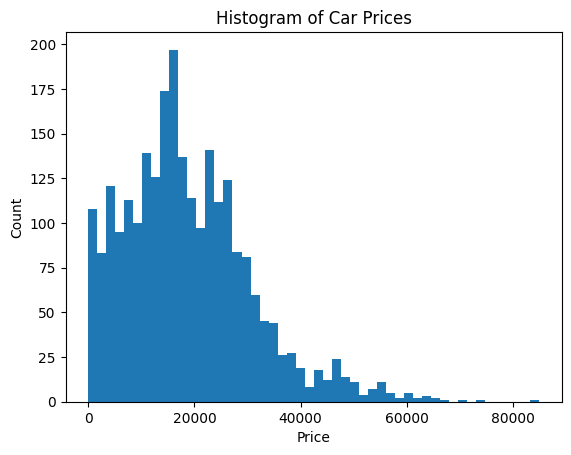

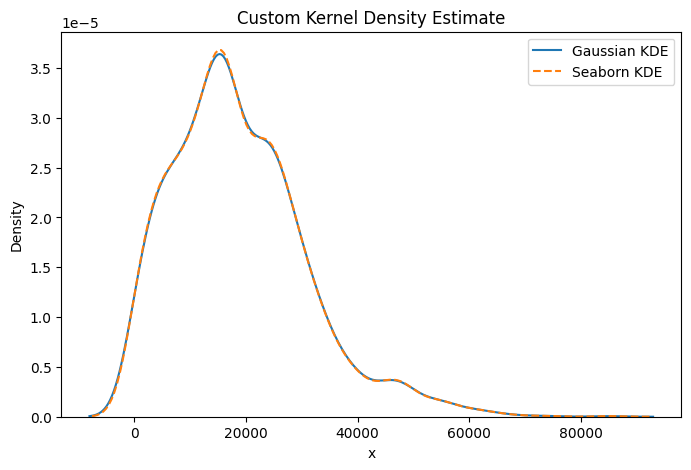

In [32]:
### TESTING KDE
import seaborn as sns
import pandas as pd
import numpy as np
airbnb_kde = pd.read_csv("KNN/data/airbnb_hw.csv")
USA_cars = pd.read_csv("KNN/data/USA_cars_datasets.csv")

# KDE for airbnb prices!
airbnb_kde['Price'].dtype
data_airbnb = (
    airbnb_kde["Price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)
print(data_airbnb.dtype)
plt.hist(data_airbnb, bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Histogram of Airbnb Prices")
plt.show()
fig, ax = plt.subplots(figsize=(8, 5))
kernel_density_plot(data_airbnb, kernel="gaussian", ax=ax)
sns.kdeplot(data_airbnb, ax=ax, linestyle="--", label="Seaborn KDE")
ax.legend()
plt.show()

# after doing airbnb test I was honestly unsure if it was working so i decided to try on another data set of a similar type.
# doing the same on the USA cars data set to make sure it is actually working.
USA_cars.head()
data_car = USA_cars['price']
plt.hist(data_car, bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Histogram of Car Prices")
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
kernel_density_plot(data_car, kernel="gaussian", ax=ax)
sns.kdeplot(data_car, ax=ax, linestyle="--", label="Seaborn KDE")
ax.legend()
plt.show()